#**ANALISIS TREN PASAR GLOBAL UNTUK STRATEGI PELUNCURAN GAME BARU**

PixelStart Inc. memiliki anggaran untuk mengembangkan satu game berskala besar (AAA Game). Namun, CEO ragu harus membuat game bergenre apa dan untuk platform apa. Ia meminta Anda menganalisis data penjualan historis untuk meminimalkan risiko kegagalan.



DALAM PROJECT INI SAYA MENGGUNAKAN 6 TAHAPAN CRISP DM
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment (Rekomendasi Strategis)


**1. BUSINESS UNDERSTANDING**

Problem: Ketidakpastian pasar menyebabkan risiko tinggi dalam investasi pengembangan game baru

Tujuan bisnis: Mengidentifikasi Genre dan Platfirm yang memiliki potensi penjualan global tertinggi, serta memahami preferensi pasar regional

Pertanyaan Kunci:
1. Genre apa yang paling laku secara global?
2. Apakah preferensi pemain di Jepang berbeda dengan di Amerika Utara?
3. Platforn mana yang sedang tren atau masih relevan?

**2. DATA UNDERSTANDING**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data
df = pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Melihat tipe data dan nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dari data di atas ternyata terdapat nilai yang kosong pada kolom Year dan Publisher. Lalu juga terdapat tipe data yang salah pada kolom Year yang seharusnya berbentuk interger

**3. DATA PREPARATION**

In [5]:
# Menghapus baris yang tahunnya kosong
df = df.dropna(subset=['Year'])

# Mengubah tahun menjadi interger
df['Year'] = df['Year'].astype(int)

# Filter data: Hanya mengambuk dari tahun 2005 ke atas agar lebih relevan
df_modern = df[df['Year'] >= 2005]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
df_afterps4realese = df[df['Year'] >= 2013]

**4. MODELLING**

In [6]:
# Groupin game berdasarkan genre
genre_sales = df_modern.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


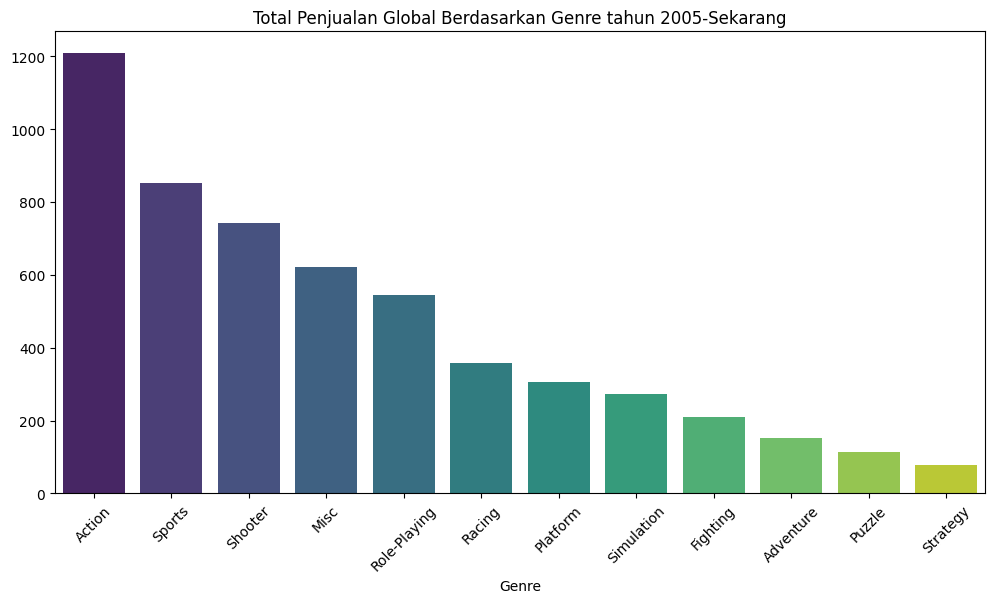

In [23]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis', hue=genre_sales.index, legend=False)
plt.title('Total Penjualan Global Berdasarkan Genre tahun 2005-Sekarang')
plt.xticks(rotation=45)
plt.show()

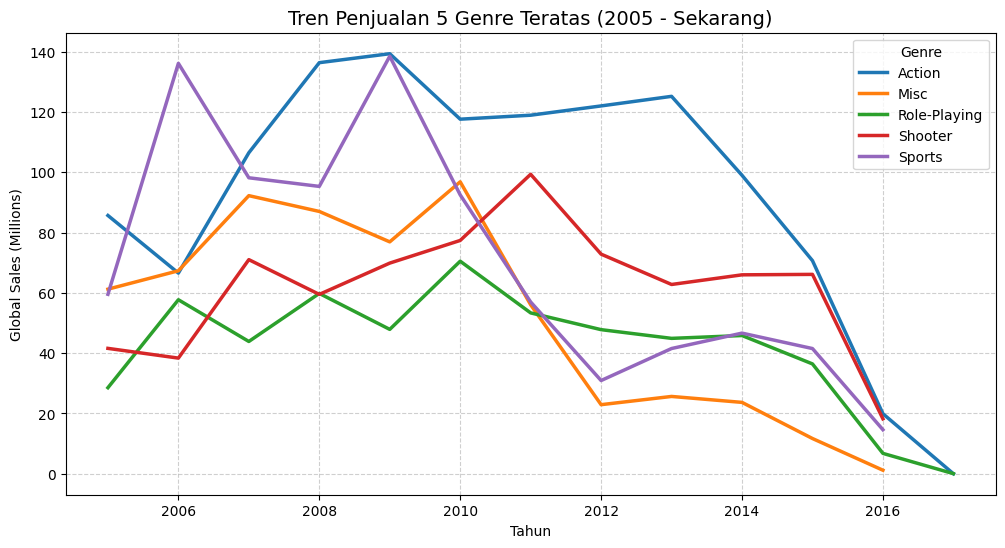

In [18]:
# --- TAMBAHAN 1: Menganalisis Tren Genre Top 5 Seiring Waktu ---

# 1. Ambil 5 Genre teratas
top_genres = df_modern.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5).index

# 2. Filter data hanya untuk 5 genre tersebut
df_top_genre = df_modern[df_modern['Genre'].isin(top_genres)]

# 3. Buat Pivot Table untuk tren per tahun
genre_trend = df_top_genre.pivot_table(index='Year', columns='Genre', values='Global_Sales', aggfunc='sum')

# 4. Visualisasi Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trend, dashes=False, linewidth=2.5)
plt.title('Tren Penjualan 5 Genre Teratas (2005 - Sekarang)', fontsize=14)
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Tahun')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Genre')
plt.show()

Hasil didapat bahwa kemungkinan besar genre Action, Sports dan shooter mendominasi dan sangat diminati

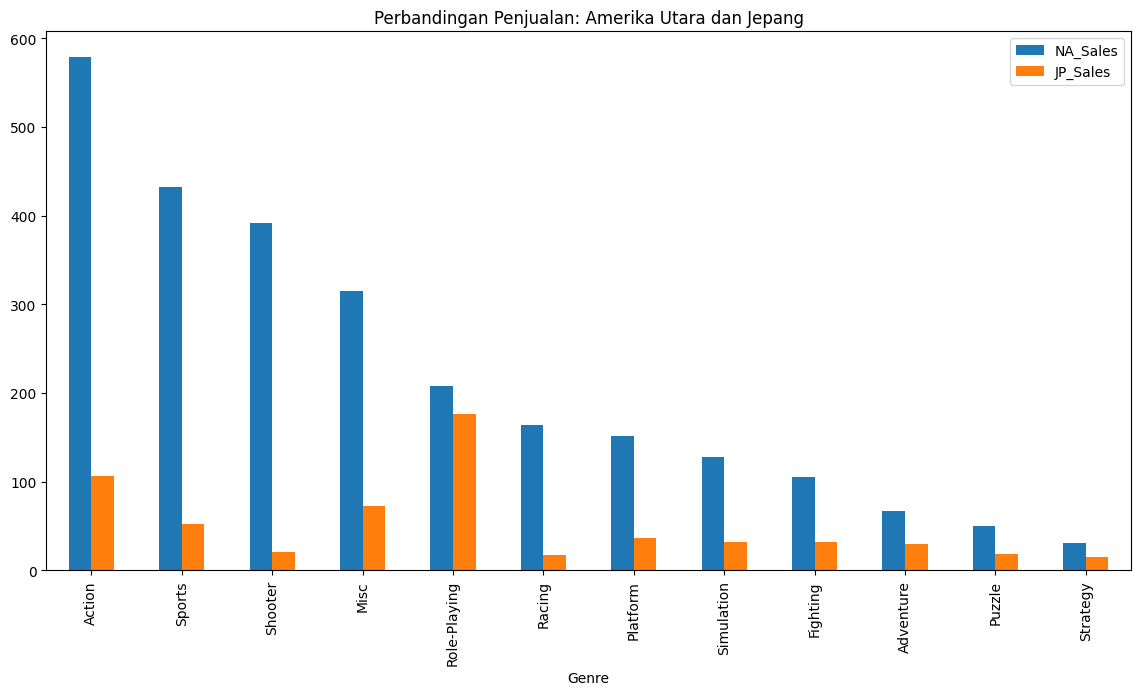

In [10]:
# Membandingkan Top 5 Genre di North America dan Jepang
region_comparison = df_modern.groupby('Genre')[['NA_Sales', 'JP_Sales']].sum()

# Plotting
region_comparison[['NA_Sales', 'JP_Sales']].sort_values(by='NA_Sales', ascending=False).plot(kind='bar', figsize=(14,7))
plt.title('Perbandingan Penjualan: Amerika Utara dan Jepang')
plt.show()

In [11]:
# Platform yang paling sering digunakan
platform_tren = df_modern.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

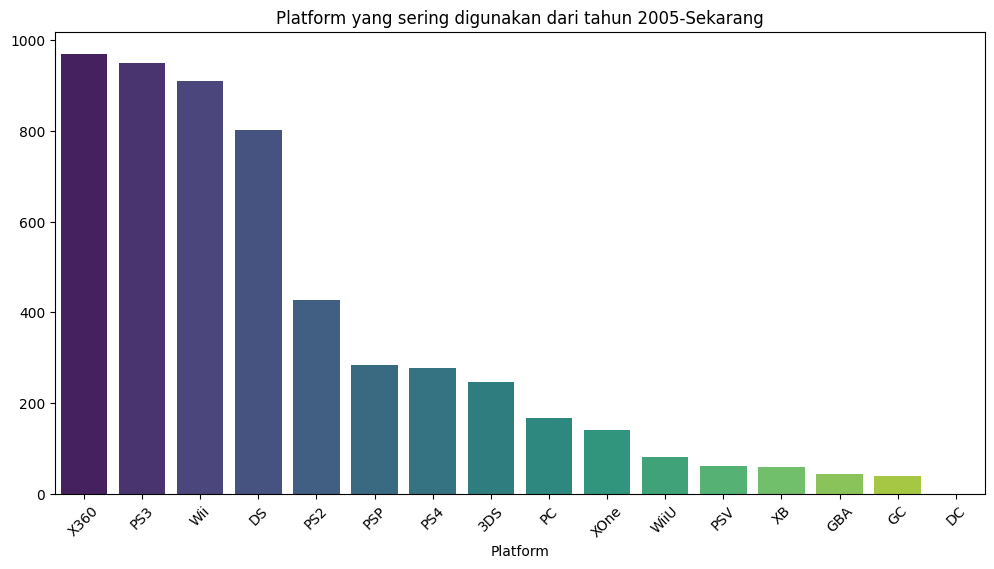

In [24]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_tren.index, y=platform_tren.values, palette='viridis', hue=platform_tren.index, legend=False)
plt.title('Platform yang sering digunakan dari tahun 2005-Sekarang')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Plaform yang sering digunakan semenjak PS4 Rilis tahun 2013
platform_trenps4 = df_afterps4realese.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

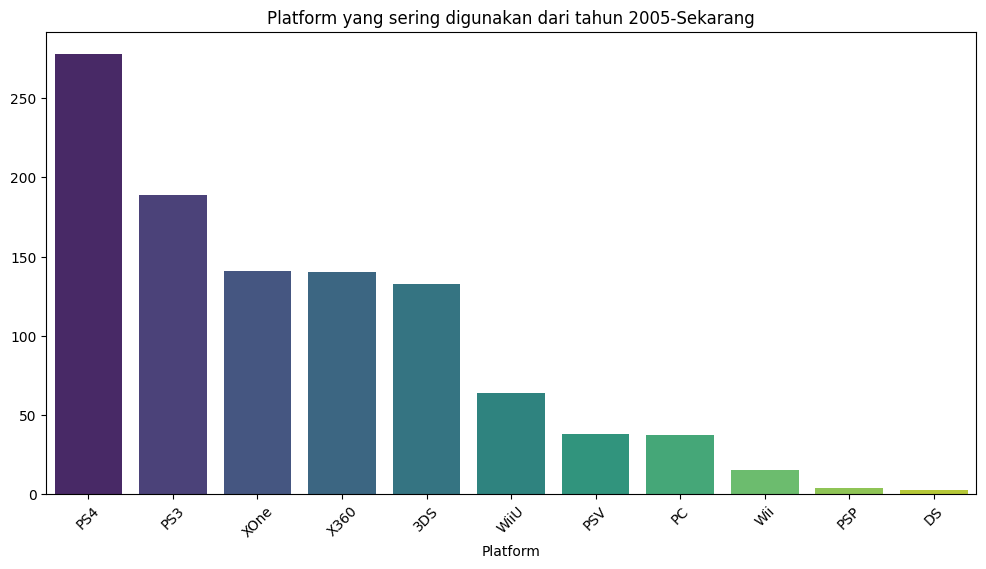

In [25]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_trenps4.index, y=platform_trenps4.values, palette='viridis', hue=platform_trenps4.index, legend=False)
plt.title('Platform yang sering digunakan dari tahun 2005-Sekarang')
plt.xticks(rotation=45)
plt.show()

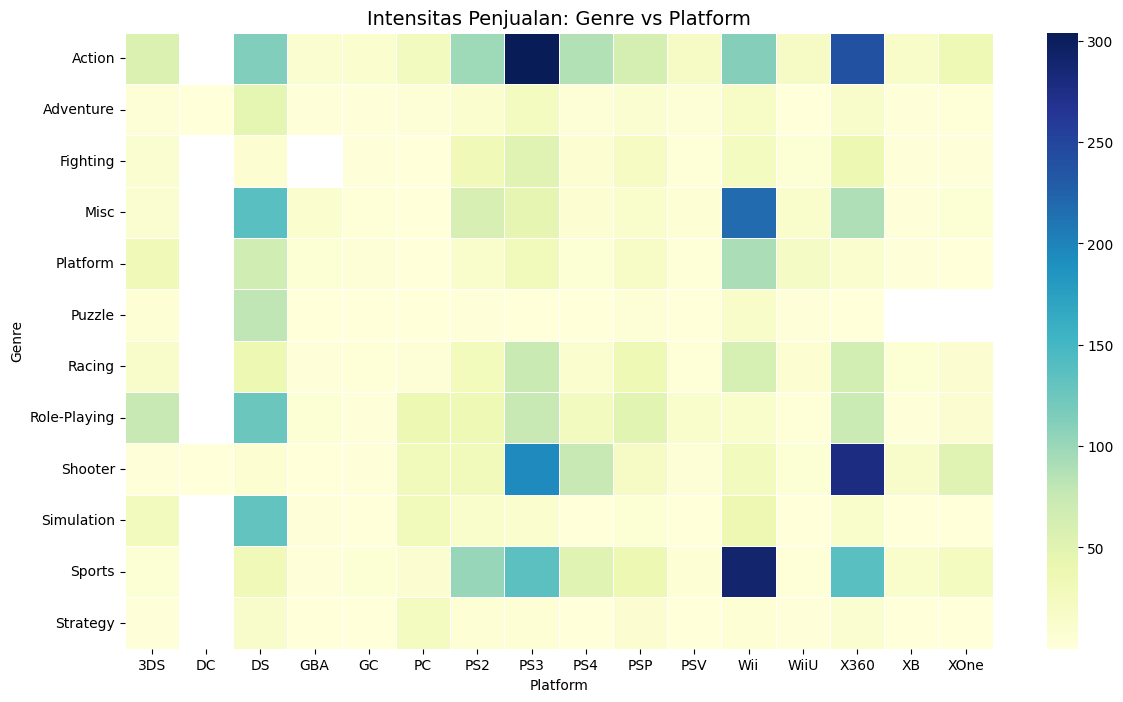

In [17]:
# --- TAMBAHAN 2: Heatmap Genre vs Platform ---

# Membuat pivot table
pivot_platform_genre = df_modern.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc='sum')

# Visualisasi Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_platform_genre, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Intensitas Penjualan: Genre vs Platform', fontsize=14)
plt.show()

**5. EVALUATION**

1. Dominasi Genre, Berdasarkan 15 tahun terakhir genre Action adalah pasar terbesar secara global.
2. Anomali Pasar Jepang, Data menunjukan bahwa pasar Jepang memiliki perilaku unik. Genre Shooter dan Action laku keras di Barat, tetapi kurang menjual di Jepang. Sebaliknya Genre RPG sangat diminati di Jepang.
3. Tren Platform, Pada saat ini secara global telah beralih menggunakan konsol yang lebih modern semenjak PS4 rilis pada tahun 2013.

**6. Deployment**

Rekomendasi yang dapat diambil perusahaan:

1. Opsi 1, Jika perusahaan ingin besaing di pasar Barat maka kembangkan game genre Action-Adventure. Sebaliknya jika ingin memasuki pasar Jepang maka kembangkan game genre RPG tetapi harus siap bersaing dengan game game yang sudah menjadi roots di Jepang seperti pokemon dan final fantasy.
2. Perusahaan disarankan dapat merilis game nya di berbagai platform terutama pada platform keluaran terbaru seperti PS4 yang saat ini banyak diminati.

In [22]:
from google.colab import files

# Save the processed DataFrame to a CSV file before downloading
df.to_csv('data_hasil_olahan.csv', index=False)

files.download('data_hasil_olahan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df_modern.to_csv('data_hasil_olahan.csv', index=False)